Camera per-CPU CGroup residency analysis
=======================
This is a run of experiments/run_youtube.py with the cgroups module enabled.
This notebook parses and plots the trace.html

In [1]:
#!/usr/bin/env python
%pylab inline
import trappy
from trace import Trace
import logging
import pandas as pd
import numpy as np
import os

from conf import LisaLogging
LisaLogging.setup(level=logging.ERROR)
logging.info('#### Setup FTrace')

path_to_html = "/home/joelaf/repo/lisa-aosp/external/lisa/results/CameraPreview_cgroups/trace.html"

tr = Trace(None, path_to_html,
           cgroup_info = { 
               'cgroups': ['foreground', 'background', 'system-background', 'top-app', 'rt'],
               'controller_ids': { 4: 'cpuset', 2: 'schedtune' }
           },
           events=[ 'sched_switch', 'cgroup_attach_task_devlib', 'cgroup_attach_task', 'sched_process_fork' ],
           normalize_time=False)

Populating the interactive namespace from numpy and matplotlib


Total amount of time spent per Cgroup (schedtune)
===========================
(NaN is the idle task)

In [2]:
tr.data_frame.cpu_residencies_cgroup('schedtune')

,cpu_0,cpu_1,cpu_2,cpu_3,cpu_4,cpu_5,cpu_6,cpu_7,total
schedtune,,,,,,,,,
background,0.113474,0.238142,0.097200,4.197716,0.000000,0.000000,0.035109,0.071318,4.752959
foreground,3.193575,2.862081,2.052267,1.335550,0.242709,0.206430,0.903222,0.392089,11.187923
root,6.626693,2.146195,0.481843,0.308890,0.483044,0.324855,0.733335,0.203509,11.308364
top-app,1.585380,1.042909,0.675688,0.377595,8.096120,7.267557,3.977378,4.715746,27.738373
NaN,20.571176,25.854235,28.783657,30.033297,23.268449,24.291365,26.446724,26.883789,206.132692


Plot per-CPU breakdown without considering idle time
------------------------------------------------------------

/home/joelaf/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


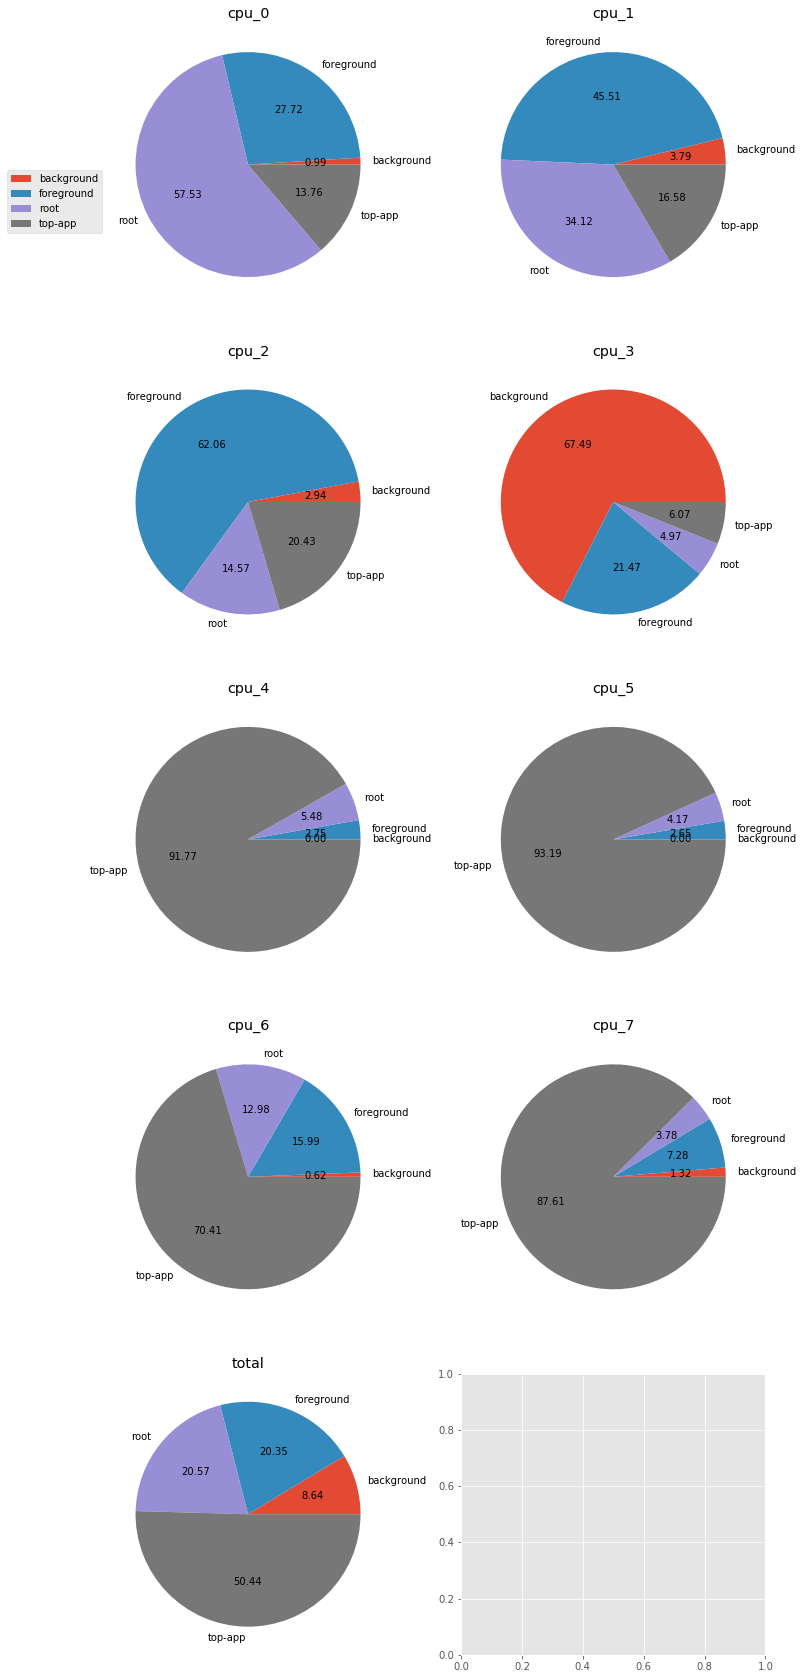

In [3]:
tr.analysis.residency.plot_cgroup('schedtune', idle=False)

Plot per-CPU breakdown WITH considering idle time (yellow slice)
------------------------------------------------------------

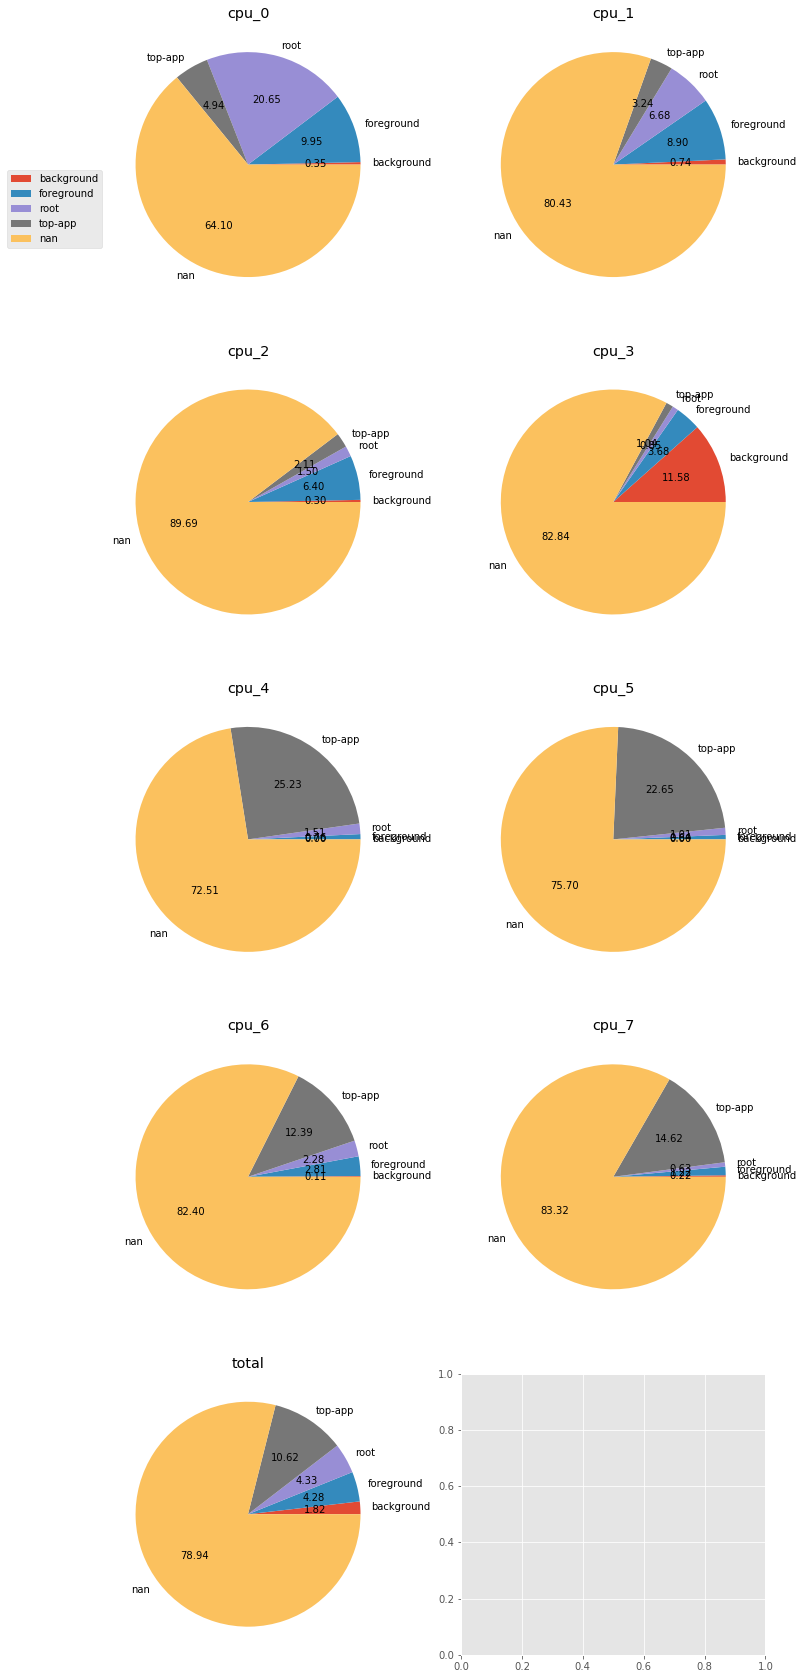

In [4]:
tr.analysis.residency.plot_cgroup('schedtune', idle=True)